In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Assingments\assingment no. (clustering)

12/15/2022  05:27 PM    <DIR>          .
12/15/2022  05:27 PM    <DIR>          ..
12/15/2022  05:07 PM    <DIR>          .ipynb_checkpoints
12/15/2022  05:27 PM            61,675 Airlines_clustering.ipynb
12/15/2022  05:17 PM           165,866 clustering(airlines).ipynb
12/03/2022  03:40 PM             1,328 crime_data.csv
12/15/2022  04:02 PM           255,715 CrimeData.ipynb
12/15/2022  03:54 PM           157,167 EastWestAirlines.csv
12/03/2022  03:40 PM           268,963 EastWestAirlines.xlsx
12/03/2022  03:40 PM             1,560 Problem_Statement(Airlines).txt
12/03/2022  03:46 PM               399 ProblemSatement(crime_data).txt
               8 File(s)        912,673 bytes
               3 Dir(s)  139,959,500,800 bytes free


In [3]:
df=pd.read_csv('EastWestAirlines.csv')

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.shape

(3999, 12)

In [7]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [10]:
#Normalizing dataframe 
df_norm=norm_func(df.iloc[:,:])

In [11]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


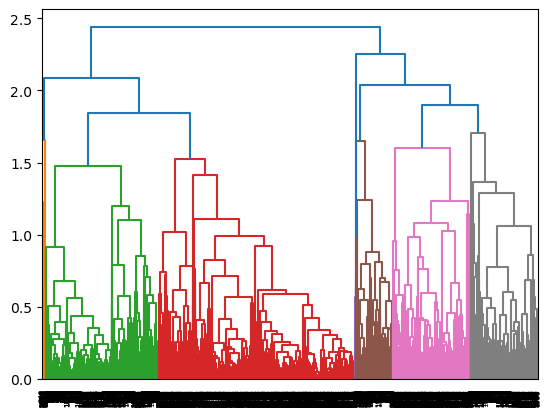

In [12]:
#create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [18]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [19]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [20]:
#save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [21]:
new_df=df.copy()
new_df['clusters'] = Clusters

In [29]:
new_df["clusters"].value_counts()

1    2493
0    1169
4     298
3      35
2       4
Name: clusters, dtype: int64

In [22]:
new_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [34]:
new_df[new_df['clusters'] == 0].count()

ID#                  1169
Balance              1169
Qual_miles           1169
cc1_miles            1169
cc2_miles            1169
cc3_miles            1169
Bonus_miles          1169
Bonus_trans          1169
Flight_miles_12mo    1169
Flight_trans_12      1169
Days_since_enroll    1169
Award?               1169
clusters             1169
dtype: int64

In [35]:
new_df[new_df['clusters'] == 1].count()

ID#                  2493
Balance              2493
Qual_miles           2493
cc1_miles            2493
cc2_miles            2493
cc3_miles            2493
Bonus_miles          2493
Bonus_trans          2493
Flight_miles_12mo    2493
Flight_trans_12      2493
Days_since_enroll    2493
Award?               2493
clusters             2493
dtype: int64

In [36]:
new_df[new_df['clusters'] == 2].count()

ID#                  4
Balance              4
Qual_miles           4
cc1_miles            4
cc2_miles            4
cc3_miles            4
Bonus_miles          4
Bonus_trans          4
Flight_miles_12mo    4
Flight_trans_12      4
Days_since_enroll    4
Award?               4
clusters             4
dtype: int64

In [37]:
new_df[new_df['clusters'] == 3].count()

ID#                  35
Balance              35
Qual_miles           35
cc1_miles            35
cc2_miles            35
cc3_miles            35
Bonus_miles          35
Bonus_trans          35
Flight_miles_12mo    35
Flight_trans_12      35
Days_since_enroll    35
Award?               35
clusters             35
dtype: int64

In [38]:
new_df[new_df['clusters'] == 4].count()

ID#                  298
Balance              298
Qual_miles           298
cc1_miles            298
cc2_miles            298
cc3_miles            298
Bonus_miles          298
Bonus_trans          298
Flight_miles_12mo    298
Flight_trans_12      298
Days_since_enroll    298
Award?               298
clusters             298
dtype: int64

# K means Clustering

In [80]:
df=pd.read_csv('EastWestAirlines.csv')

In [81]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [82]:
#Normalizing dataframe 
df_norm=norm_func(df.iloc[:,:])

In [83]:
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [84]:
from sklearn.cluster import KMeans

In [85]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [86]:
model_kmeans.labels_

array([4, 4, 4, ..., 1, 2, 2])

In [87]:
md=pd.Series(model_kmeans.labels_)

In [88]:
#Complete-linkage clustering - Wikipedia
df["labels"]=pd.Series(model_kmeans.labels_)

In [89]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [90]:
clusters_kmeans=pd.DataFrame(model_kmeans.labels_,columns=['Clusters'])
clusters_kmeans

,Clusters
0,4
1,4
2,4
3,4
4,3
...,...
3994,1
3995,1
3996,1
3997,2


In [91]:
df.groupby(['labels'])["ID#"].apply(lambda x:tuple(x))

labels
0    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
1    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
2    (1967, 1969, 2058, 2084, 2119, 2127, 2128, 213...
3    (5, 9, 10, 12, 16, 17, 19, 20, 21, 29, 36, 39,...
4    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
Name: ID#, dtype: object

In [59]:
new_df= df.copy()
new_df['clusters'] = clusters_kmeans

In [64]:
new_df["clusters"].value_counts()

4    1111
1     864
0     792
3     689
2     543
Name: clusters, dtype: int64

In [60]:
new_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,4


In [65]:
new_df[new_df['clusters'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0,0
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,0,0
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0,0
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,0,0
36,37,23193,0,1,1,1,650,4,550,3,7861,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0


In [66]:
new_df[new_df['clusters'] == 1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,1,1
2190,2207,61617,0,2,1,1,23495,13,0,0,3972,0,1,1
2192,2209,112891,0,1,1,1,500,1,500,1,3909,0,1,1
2200,2217,12271,500,2,1,1,7684,15,1000,2,4219,0,1,1


In [67]:
new_df[new_df['clusters'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2,2
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,2,2
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886,3909,84979,0,4,1,1,36702,16,0,0,1600,0,2,2
3899,3922,90666,0,4,1,1,32474,14,0,0,1582,0,2,2
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,2,2
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2,2


In [68]:
new_df[new_df['clusters'] == 3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,3,3
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3,3


In [69]:
new_df[new_df['clusters'] == 4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,clusters
1950,1967,15676,0,1,1,1,0,0,0,0,3178,0,4,4
1952,1969,40675,0,1,1,1,1413,9,0,0,2895,0,4,4
2041,2058,15148,0,1,1,1,15148,3,0,0,269,0,4,4
2067,2084,89708,0,1,1,1,8000,4,0,0,3173,0,4,4
2102,2119,59913,0,1,1,1,2210,5,150,1,3481,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,4,4
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,4,4
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,4,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,4


# DB Scan

In [72]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler=MinMaxScaler()
data=scaler.fit_transform(df)
data

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 2.50000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 2.50000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 2.50000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 1.00000000e+00]])

In [74]:
dbs=DBSCAN(min_samples=5,eps=0.2)
claas_pr=dbs.fit_predict(data)
claas_pr

array([ 0,  0,  0, ..., 12, 11, 11], dtype=int64)

In [75]:
dbs_df=df.copy()
dbs_df['clusters']=claas_pr
dbs_df['clusters'].value_counts()

 11    934
 0     737
 3     497
 1     283
 2     246
-1     238
 7     206
 6     170
 4     154
 12    114
 5      98
 8      95
 13     75
 15     73
 9      65
 14      8
 10      6
Name: clusters, dtype: int64

In [76]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
clusters,,,,,,,,,,,,,
-1,1787.197479,206111.247899,1540.096639,2.630252,1.184874,1.205882,45591.424370,25.592437,2981.844538,8.789916,4606.575630,0.705882,1.701681
0,1164.215739,45641.617368,28.618725,1.000000,1.000000,1.000000,2357.453189,5.645862,205.160109,0.622795,5579.344640,0.000000,1.000000
1,1658.307420,83270.123675,81.169611,4.000000,1.000000,1.000000,40480.660777,19.406360,441.858657,1.434629,4749.183746,1.000000,3.000000
2,1538.386179,95855.532520,11.654472,3.000000,1.000000,1.000000,18662.829268,15.544715,111.597561,0.390244,4910.939024,0.000000,2.000000
3,1913.331992,68101.802817,133.350101,1.000000,1.000000,1.000000,6240.569416,7.402414,699.334004,2.169014,4306.959759,1.000000,0.000000
4,1007.019481,83060.681818,34.402597,3.000000,1.000000,1.000000,20115.655844,16.954545,383.006494,1.071429,5896.331169,1.000000,3.000000
5,1147.479592,74227.520408,29.540816,2.000000,1.000000,1.000000,9291.071429,13.693878,123.122449,0.336735,5649.438776,0.000000,1.000000
6,1242.464706,134035.911765,65.229412,5.000000,1.000000,1.000000,74381.270588,20.935294,413.764706,1.352941,5497.217647,1.000000,3.000000
7,1695.213592,132409.674757,14.577670,4.000000,1.000000,1.000000,37877.524272,17.708738,245.247573,0.660194,4730.936893,0.000000,2.000000
